<a href="https://colab.research.google.com/github/shazzad-hasan/ethereum-addresses-space-clustering/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

# import random
# random.seed(123)

In [3]:
%run "/content/drive/MyDrive/ethereum-address-space-clustering/helper_functions.py"
%run "/content/drive/MyDrive/ethereum-address-space-clustering/tsne_plotter.py"
%run "/content/drive/MyDrive/ethereum-address-space-clustering/silhoutte_plotter.py"

In [4]:
df = pd.read_csv("/content/drive/MyDrive/ethereum-address-space-clustering/data/labeled_address_data.csv").drop(columns=['Unnamed: 0'])
df.head()

,address,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,...,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance,Entity
0,0xd26a4d3ce34eef62a5eacc1f07b6e4ed11d0d516,256,151,19.774926,0.077246,6.419212e+03,25.075046,77.681603,0.514448,1.893196e+04,...,2.704566e+03,0,0,100093.900000,254570.169509,59336.572549,213155.856128,30,60.153426,NaN
1,0x5730d1ea8624b745dde30e57d7f6e8f83fcec98a,256,56,3651.334521,14.263025,1.607194e+06,6278.101788,2706.690819,48.333765,1.378033e+06,...,8.106079e+04,0,0,639384.018182,857951.592990,156710.439216,341322.129482,24,81.758482,NaN
2,0x1efc1e054f14aa9ab69e71c8f181d4b8f4005735,256,104,14800.887683,57.815968,7.144330e+06,27907.538523,16843.009975,161.952019,7.774533e+06,...,4.573254e+05,0,0,208644.184466,621665.577772,102012.976471,573323.712422,27,95.799344,NaN
3,0xfd3a935174aeb79b8d5d3935de1188e37427561f,768,892,23397.465171,30.465449,1.463310e+05,190.535165,27432.509324,30.753934,1.863646e+05,...,5.036881e+03,3,116,69598.839506,880138.733789,33976.006519,129262.257907,11,40.338890,NaN
4,0xf27b5cf6d40531556f6e6eeb445a8c88c8f9815f,1024,9860,91026.755919,88.893316,5.362961e+07,52372.662163,92880.306328,9.419909,5.539882e+07,...,4.261448e+06,0,0,3014.540521,39706.386044,28969.567937,199625.182527,15,2625.511306,NaN


In [5]:
pipeline, processed_data = data_pipeline(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


In [ ]:
tsne_results = calculate_tsne(processed_data, n_components=2, perplexity=50, n_iter=500, learning_rate=200)

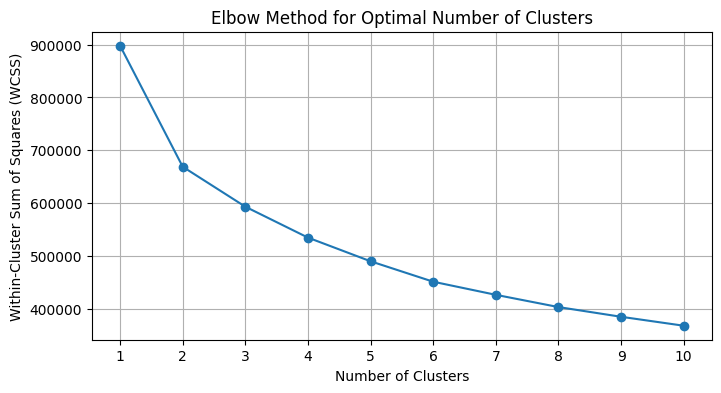

In [6]:
plot_elbow_method(processed_data, max_n_clusters=10)

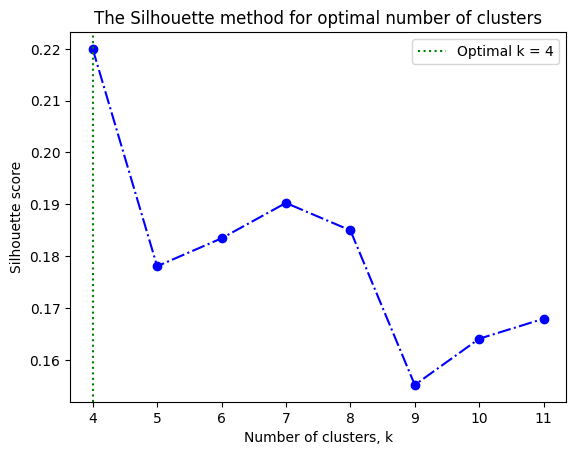

In [7]:
plot_silhouette_scores(processed_data, 4, 12)

For n_clusters = 4, the average silhouette_score is : 0.220


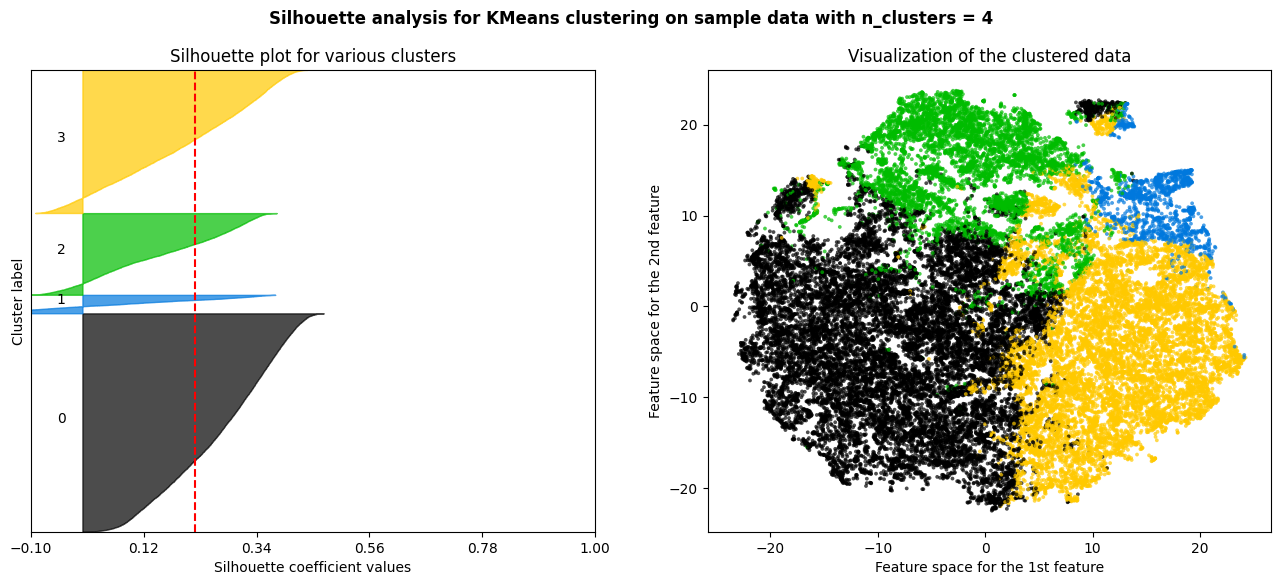

For n_clusters = 6, the average silhouette_score is : 0.183


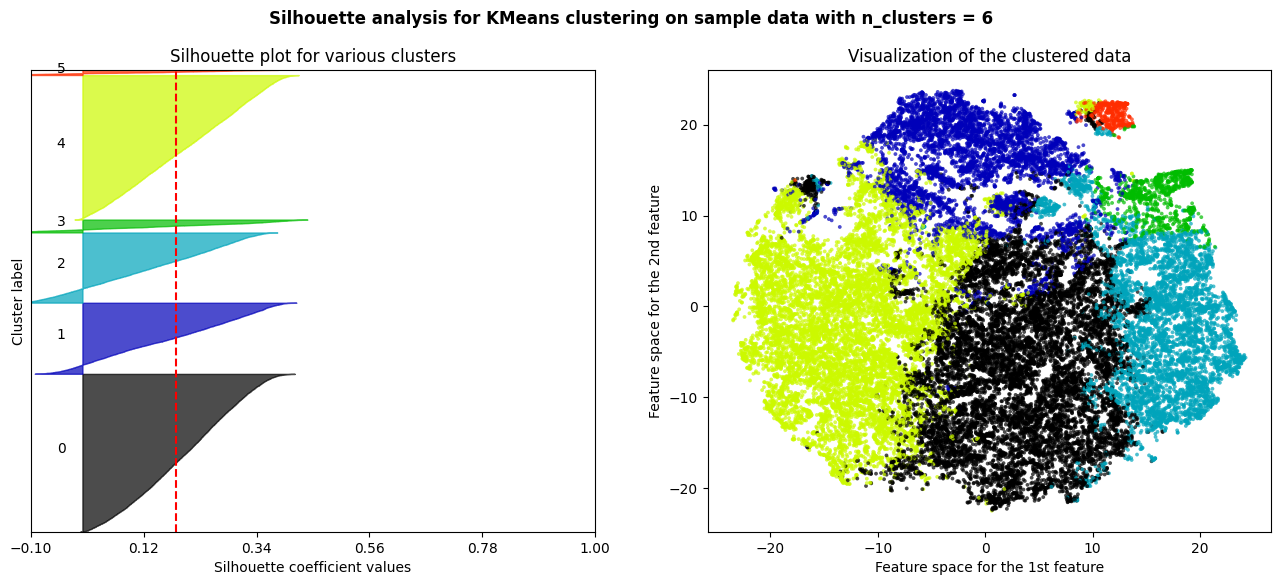

For n_clusters = 8, the average silhouette_score is : 0.185


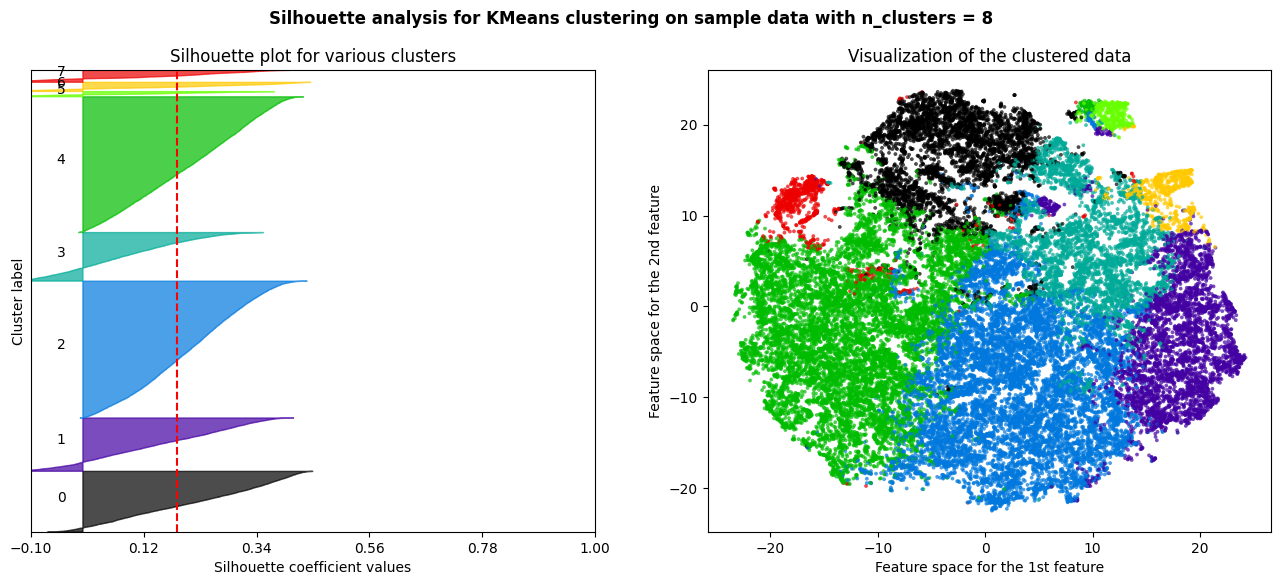

For n_clusters = 10, the average silhouette_score is : 0.164


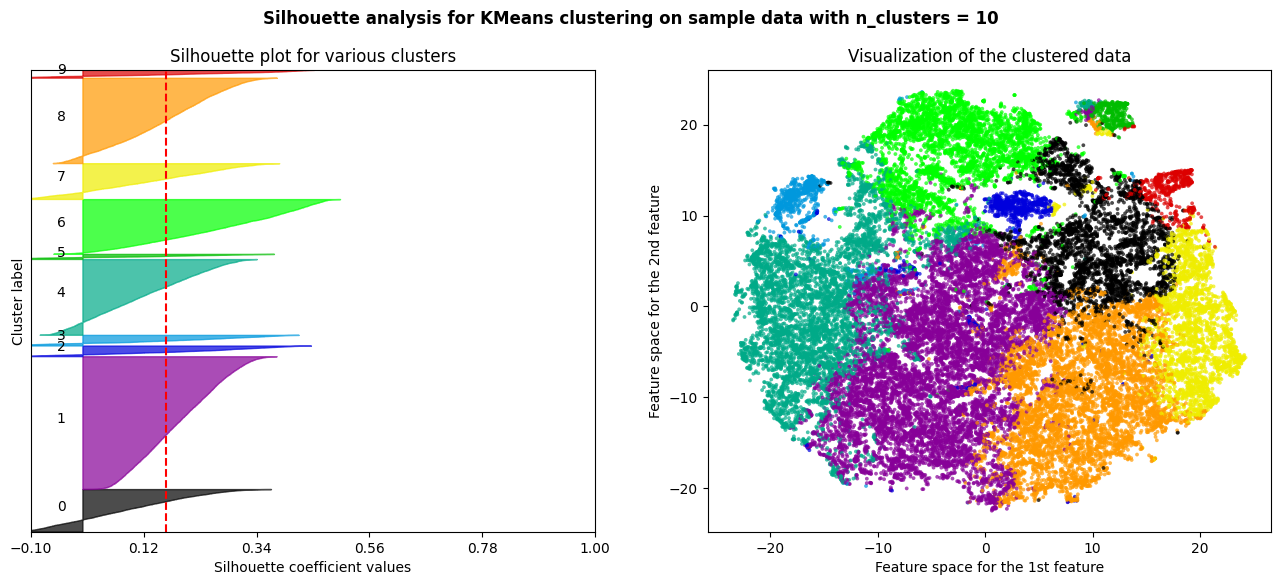

In [8]:
range_n_clusters = [4,6,8,10]
sils = silhouette_plotter(processed_data, range_n_clusters, tsne_results)

In [11]:
param_grid = {
    'n_clusters': range(2, 9),
    'init': ['k-means++'],
    'n_init': [20,30,50],
    'max_iter': [300, 500],
    'tol': [0.001, 0.01],
    'algorithm': ['lloyd', 'elkan']
}

kmeans = KMeans(random_state=42)
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5)
grid_search.fit(processed_data)

print("Best hyperparameters: ", grid_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 8, 'n_init': 30, 'tol': 0.001}
Optimal number of clusters based on parameter grid: 8


In [13]:
kmeans = KMeans(n_clusters = grid_search.best_params_['n_clusters'],
                init=grid_search.best_params_['init'],
                max_iter=grid_search.best_params_['max_iter'],
                tol=grid_search.best_params_['tol'],
                algorithm=grid_search.best_params_['algorithm'],
                random_state=42
                )

clusters = kmeans.fit(processed_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=42, tol=0.001)

In [20]:
dataset_with_clusters = assign_cluster_to_data(df, clusters.labels_)
dataset_with_clusters.head()

,address,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,...,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance,Entity,cluster
0,0xd26a4d3ce34eef62a5eacc1f07b6e4ed11d0d516,256,151,19.774926,0.077246,6.419212e+03,25.075046,77.681603,0.514448,1.893196e+04,...,0,0,100093.900000,254570.169509,59336.572549,213155.856128,30,60.153426,NaN,0
1,0x5730d1ea8624b745dde30e57d7f6e8f83fcec98a,256,56,3651.334521,14.263025,1.607194e+06,6278.101788,2706.690819,48.333765,1.378033e+06,...,0,0,639384.018182,857951.592990,156710.439216,341322.129482,24,81.758482,NaN,3
2,0x1efc1e054f14aa9ab69e71c8f181d4b8f4005735,256,104,14800.887683,57.815968,7.144330e+06,27907.538523,16843.009975,161.952019,7.774533e+06,...,0,0,208644.184466,621665.577772,102012.976471,573323.712422,27,95.799344,NaN,1
3,0xfd3a935174aeb79b8d5d3935de1188e37427561f,768,892,23397.465171,30.465449,1.463310e+05,190.535165,27432.509324,30.753934,1.863646e+05,...,3,116,69598.839506,880138.733789,33976.006519,129262.257907,11,40.338890,NaN,5
4,0xf27b5cf6d40531556f6e6eeb445a8c88c8f9815f,1024,9860,91026.755919,88.893316,5.362961e+07,52372.662163,92880.306328,9.419909,5.539882e+07,...,0,0,3014.540521,39706.386044,28969.567937,199625.182527,15,2625.511306,NaN,6


In [21]:
dataset_with_clusters["cluster"].value_counts()

,count
cluster,
4,10575
2,10558
0,4730
1,4121
3,3889
7,927
6,719
5,397


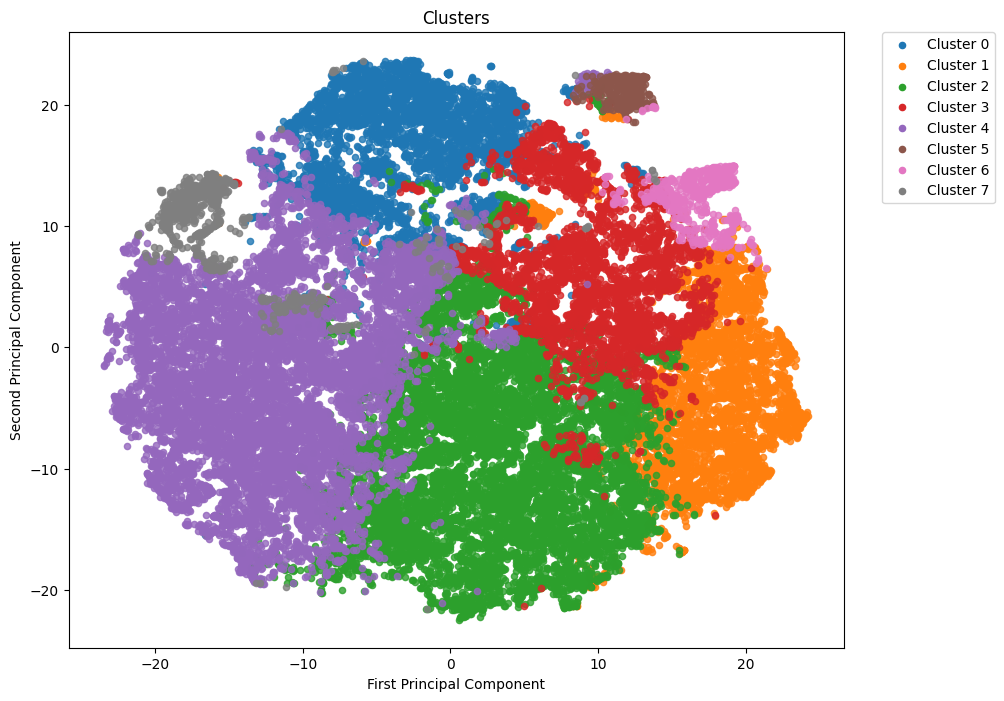

In [26]:
plot_tsne(clusters.labels_, tsne_results)

In [23]:
categories = ("Exchange", "Mining", "ICO Wallets")
colors = ("blue", "red", "green")

cluster_types = {}
for categ in categories:
    cluster_types[categ] = find_category_of_cluster(clusters, dataset_with_clusters, categ)

cl_types = list(cluster_types.values())
print(cl_types)

Exchange
Cluster num: 0, num of addresses: 0, cluster size: 4730, label density: 0.0000
Cluster num: 1, num of addresses: 7, cluster size: 4121, label density: 0.1699
Cluster num: 2, num of addresses: 0, cluster size: 10558, label density: 0.0000
Cluster num: 3, num of addresses: 2, cluster size: 3889, label density: 0.0514
Cluster num: 4, num of addresses: 0, cluster size: 10575, label density: 0.0000
Cluster num: 5, num of addresses: 9, cluster size: 397, label density: 2.2670
Cluster num: 6, num of addresses: 93, cluster size: 719, label density: 12.9346
Cluster num: 7, num of addresses: 1, cluster size: 927, label density: 0.1079
Mining
Cluster num: 0, num of addresses: 0, cluster size: 4730, label density: 0.0000
Cluster num: 1, num of addresses: 0, cluster size: 4121, label density: 0.0000
Cluster num: 2, num of addresses: 0, cluster size: 10558, label density: 0.0000
Cluster num: 3, num of addresses: 4, cluster size: 3889, label density: 0.1029
Cluster num: 4, num of addresses: 

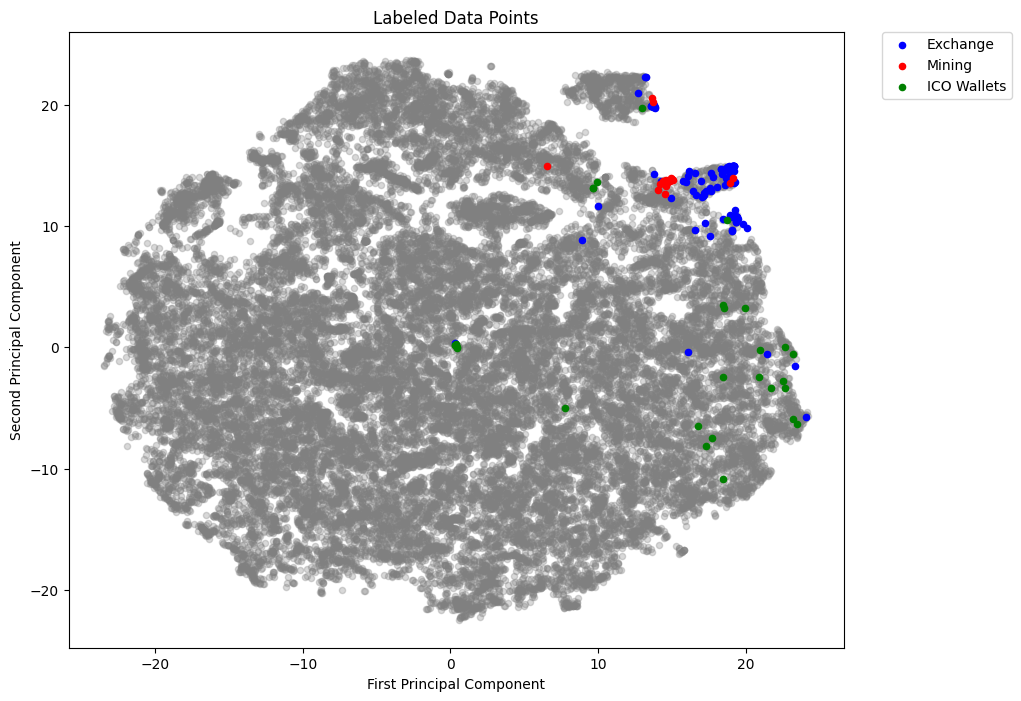

In [27]:
df_label = df[df["Entity"].notnull()]
df_label = df_label[["address", "Entity"]]
plot_tsne_with_labels(tsne_results, df, df_label, categories, colors)

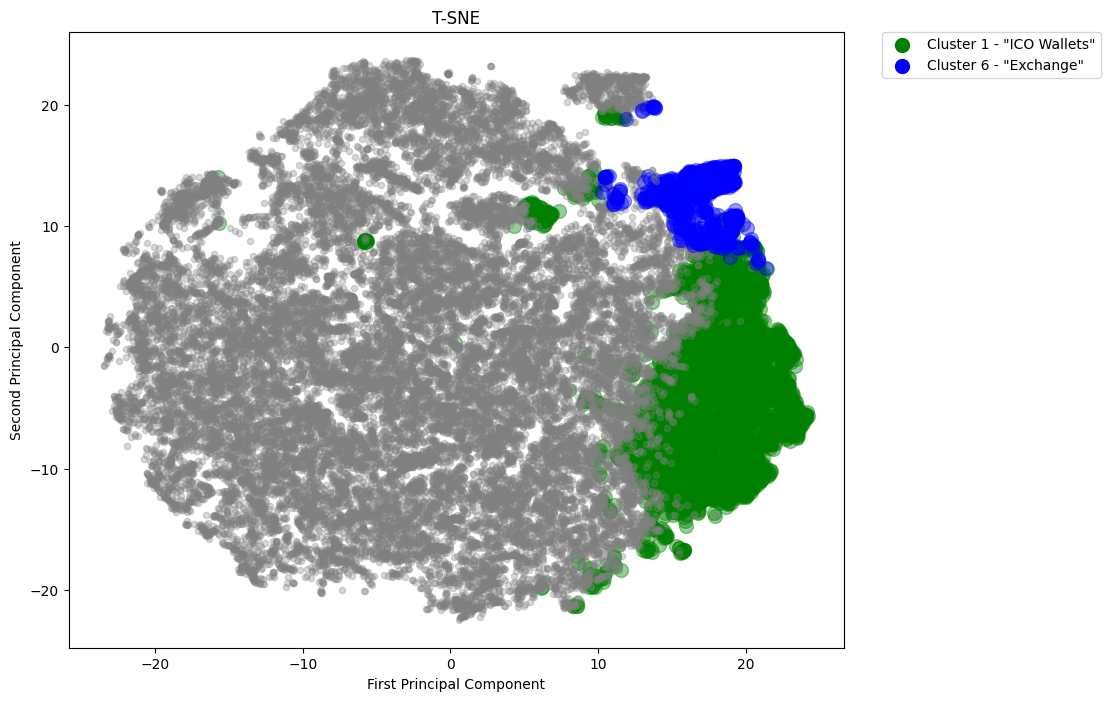

In [28]:
plot_tsne_with_labeled_clusters(tsne_results, clusters, cl_types, categories, colors)